## Introduction
 
Heart disease refers to symptoms that negatively affect the heart structure, heart rhythm, or blood vessels, leading to complications in one’s survival (Mayo Foundation for Medical Education and Research, 2021). 

We used the data set “Heart Disease Data Set” from the “Cleveland Clinic Foundation” to answer our project’s question: Can we use serum cholesterol levels, resting blood pressure, and age to predict the diagnosis of heart disease? This dataset from the Cleveland database uses 14 measured variables, having each row represent a different patient’s health condition. In the dataset, the variable “target”, which refers to the “diagnosis of heart disease”, has 2 categories based on angiography results: value 0 refers to less than 50% major blood vessel diameter narrowing while value 1 refers to more than 50%. An angiography test observes blood vessel enlargement, shrinking, or blocking with an x-ray image to see the severity or presence of heart disease (Heart Foundation NZ, 2022). 

To define our predictor variables: serum cholesterol levels (chol) is the total amount of high and low density lipoproteins and triglycerides in the blood, resting blood pressure (trestbpd) is the force of blood (in mmHg) against the arteries on admittance to the hospital, and age (age) is the number of years a person has lived.


## Methods and Results

In [74]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

We loaded some libraries to R for access to functions.

In [75]:
set.seed(20000)

We set a specific seed number to ensure our data is reproducible.

In [76]:
data <- read_csv("heartDisease.csv")
data

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


**Table 1**

Table 1 shows all the data.

In [77]:
nrow(data)

[1] 303

To find a suitable number of neighbours (k) for our data, we needed to know the number of observations in our data to avoid underfitting or overfitting. The optimal number of neighbours helps answer our question by maximizing the model's accuracy of diagnosing heart disease based on the predictors.

### Reasons for the Chosen Predictors

Since the project question aims to predict heart disease presence, and knowing the data set treats “diagnosis of heart disease” (target) as a categorical variable, the question will be answered through classification. Classification provides a simple method to categorize the binary class “target” based on predictor variables, making it optimal to use.

We chose to use resting blood pressure (trestbps), total serum cholesterol levels (chol), and age as our predictors because these variables have shown to be linked to heart disease.

High resting systolic blood pressure creates artery blockages, making the heart work harder to pump blood to the rest of the body. This thickens the lower left ventricle, increasing the risk of heart attack and heart failure (Fuchs & Whelton, 2020). 

High total (serum) cholesterol levels lead to a buildup of fatty deposits in the blood vessels. These fatty deposits can form clots and thus, restrict blood flow to the heart, leading to a heart disease called atherosclerosis (Mayo Foundation for Medical Education and Research, 2022). 

Cardiovascular disease is more prevalent in adults over the age of 65, being seen when comparing the heart beat speed of older and younger individuals under stress or physical exertion. Older individuals’ hearts are unable to pump as fast, demonstrating that aging has a weakening effect on an individual’s heart (Heart Health and Aging, 2018). This is why we will separate age by over and under 65 when plotting our data.

All other variables were not relevant as they were either categorical values or were not directly linked to heart disease, so they were taken out of the data analysis. Maximum heart rate achieved (thalac) was not used because studies have found that an elevated heart rate is not a reliable sign of heart disease (Fletcher, 2021). 


In [78]:
select_data2 <- select(data, age, trestbps, chol, target)
select_data2

age,trestbps,chol,target
<dbl>,<dbl>,<dbl>,<dbl>
63,145,233,1
37,130,250,1
41,130,204,1
⋮,⋮,⋮,⋮
68,144,193,0
57,130,131,0
57,130,236,0


**Table 2**

The select function cleaned our data, making it more readable.

In [79]:
select_data1 <- mutate(select_data2, Heart_disease_diagnosis = as_factor(target))
select_data1

age,trestbps,chol,target,Heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,1,1
37,130,250,1,1
41,130,204,1,1
⋮,⋮,⋮,⋮,⋮
68,144,193,0,0
57,130,131,0,0
57,130,236,0,0


**Table 3**

We added a column called "Heart_disease_diagnosis" for a more easily understandable name than "target". Classification predicts a categorical label, so we changed "Heart_disease_diagnosis" from a numerical variable to categorical variable. 

In [80]:
select_data <- select(select_data1, age, trestbps, chol, Heart_disease_diagnosis)
select_data

# select_data_old %>% group_by(actual_target) %>% summarize(count = n())
# select_data_young %>% group_by(actual_target) %>% summarize(count = n())

age,trestbps,chol,Heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<fct>
63,145,233,1
37,130,250,1
41,130,204,1
⋮,⋮,⋮,⋮
68,144,193,0
57,130,131,0
57,130,236,0


**Table 4**

To clean the data, we removed the column "target".

In [81]:
select_data_young <- filter(select_data, age < 65)
select_data_young

age,trestbps,chol,Heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<fct>
63,145,233,1
37,130,250,1
41,130,204,1
⋮,⋮,⋮,⋮
45,110,264,0
57,130,131,0
57,130,236,0


**Table 5**

In [83]:
select_data_old <- filter(select_data, age >= 65)
select_data_old

age,trestbps,chol,Heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<fct>
66,150,226,1
69,140,239,1
71,160,302,1
⋮,⋮,⋮,⋮
67,120,237,0
67,152,212,0
68,144,193,0


**Table 6**

For table 5 and 6, to observe the correlation between age and heart disease diagnosis, we filtered the data by age under and over 65.

Scatterplots depict the relationship between two variables well, providing an optimal way to see how effective trestbps and chol are at predicting heart disease diagnosis.  This is why scatterplots were made for Graph 1 and 2.


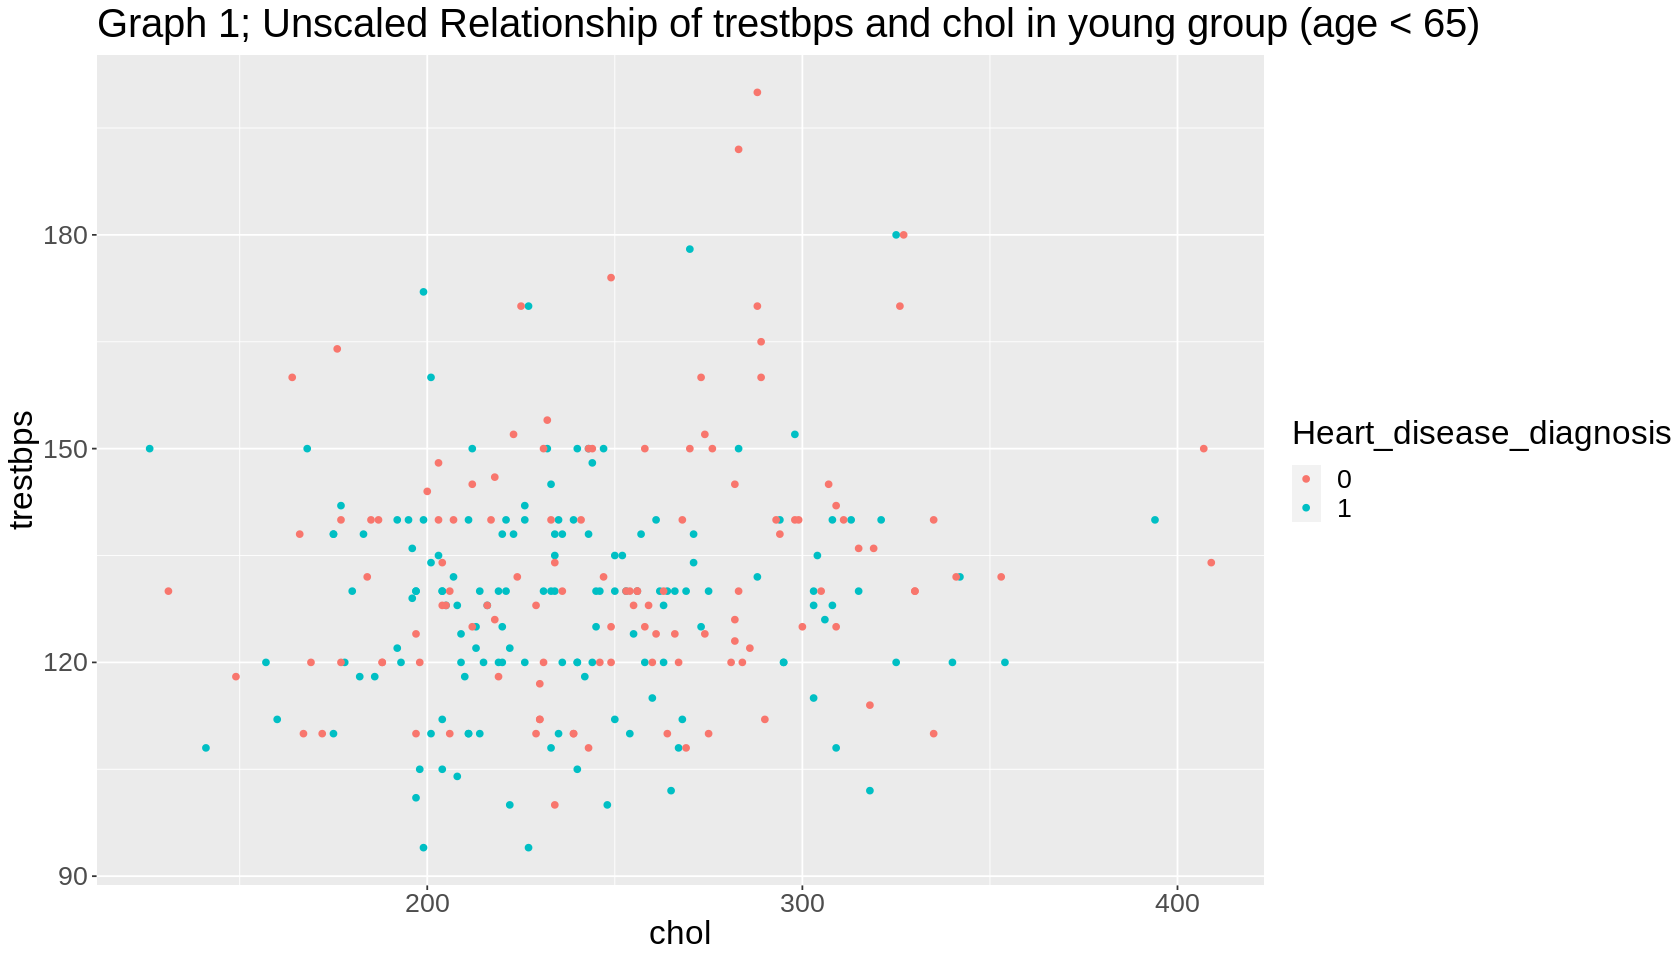

In [84]:
options(repr.plot.width=14, repr.plot.height=8)
HD_scatter_young <- ggplot(select_data_young, aes(x= chol, y = trestbps,  color = Heart_disease_diagnosis)) +
              geom_point() +
              xlab("chol") +
              ylab("trestbps") +
              ggtitle("Graph 1; Unscaled Relationship of trestbps and chol in young group (age < 65)") +
              theme(text = element_text(size=20))
HD_scatter_young


# pm_pairs <- select(select_data, temp, RH, wind, area) %>%
#             ggpairs()
# pm_pairs

**Graph 1**

A scatterplot of resting blood pressure (mm Hg) vs. serum cholesterol (mg/dl) for age less than 65, using the unscaled data. Data points are coloured based on their actual target value of heart disease (red for a negative diagnosis and blue for a positive diagnosis).

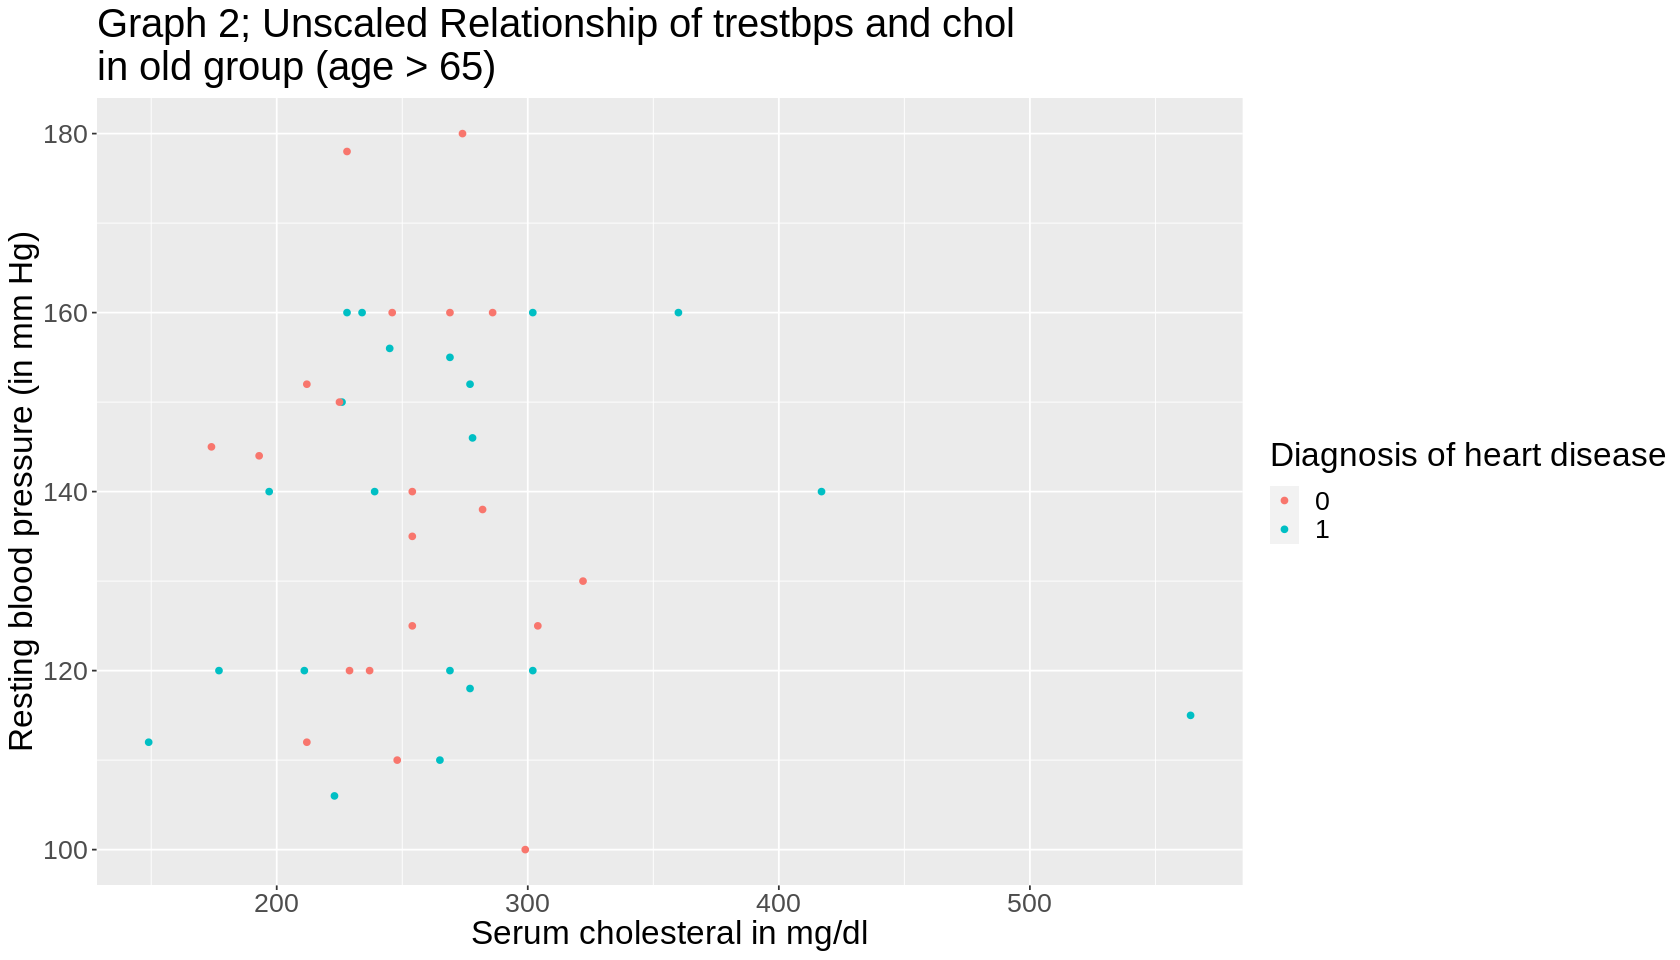

In [119]:
options(repr.plot.width=14, repr.plot.height=8)
HD_scatter_young <- ggplot(select_data_old, aes(x= chol, y = trestbps, color = Heart_disease_diagnosis)) +
              geom_point() +
              labs(x = "Serum cholesteral in mg/dl",
                   y = "Resting blood pressure (in mm Hg)",
                   colour = "Diagnosis of heart disease") +
              theme(text = element_text(size=20)) +
              ggtitle("Graph 2; Unscaled Relationship of trestbps and chol \nin old group (age > 65)")
HD_scatter_young

**Graph 2**

A scatterplot of resting blood pressure (mm Hg) vs. serum cholesterol (mg/dl) for age over 65, using the unscaled data. Data points are coloured and shaped based on their actual target value of heart disease (red for a negative diagnosis and blue for a positive diagnosis).

#### Decision on Age

After comparing Graph 1 and Graph 2, we observed 41 data points in Graph 2 (over 65) and 262 data points in Graph 1 (under 65). Due to the lack of data for above the age of 65, Graph 2 is less representative of the population. Hence,  we cannot make a definitive argument for the influence of age on heart disease. Therefore, we decided to no longer account for age when conducting the classification of predicting.


Bar graphs visualize comparisons well, providing an optimal way to see the effectiveness of the predictor variables.  This is why bar graphs were made for Graph 3 and 4.

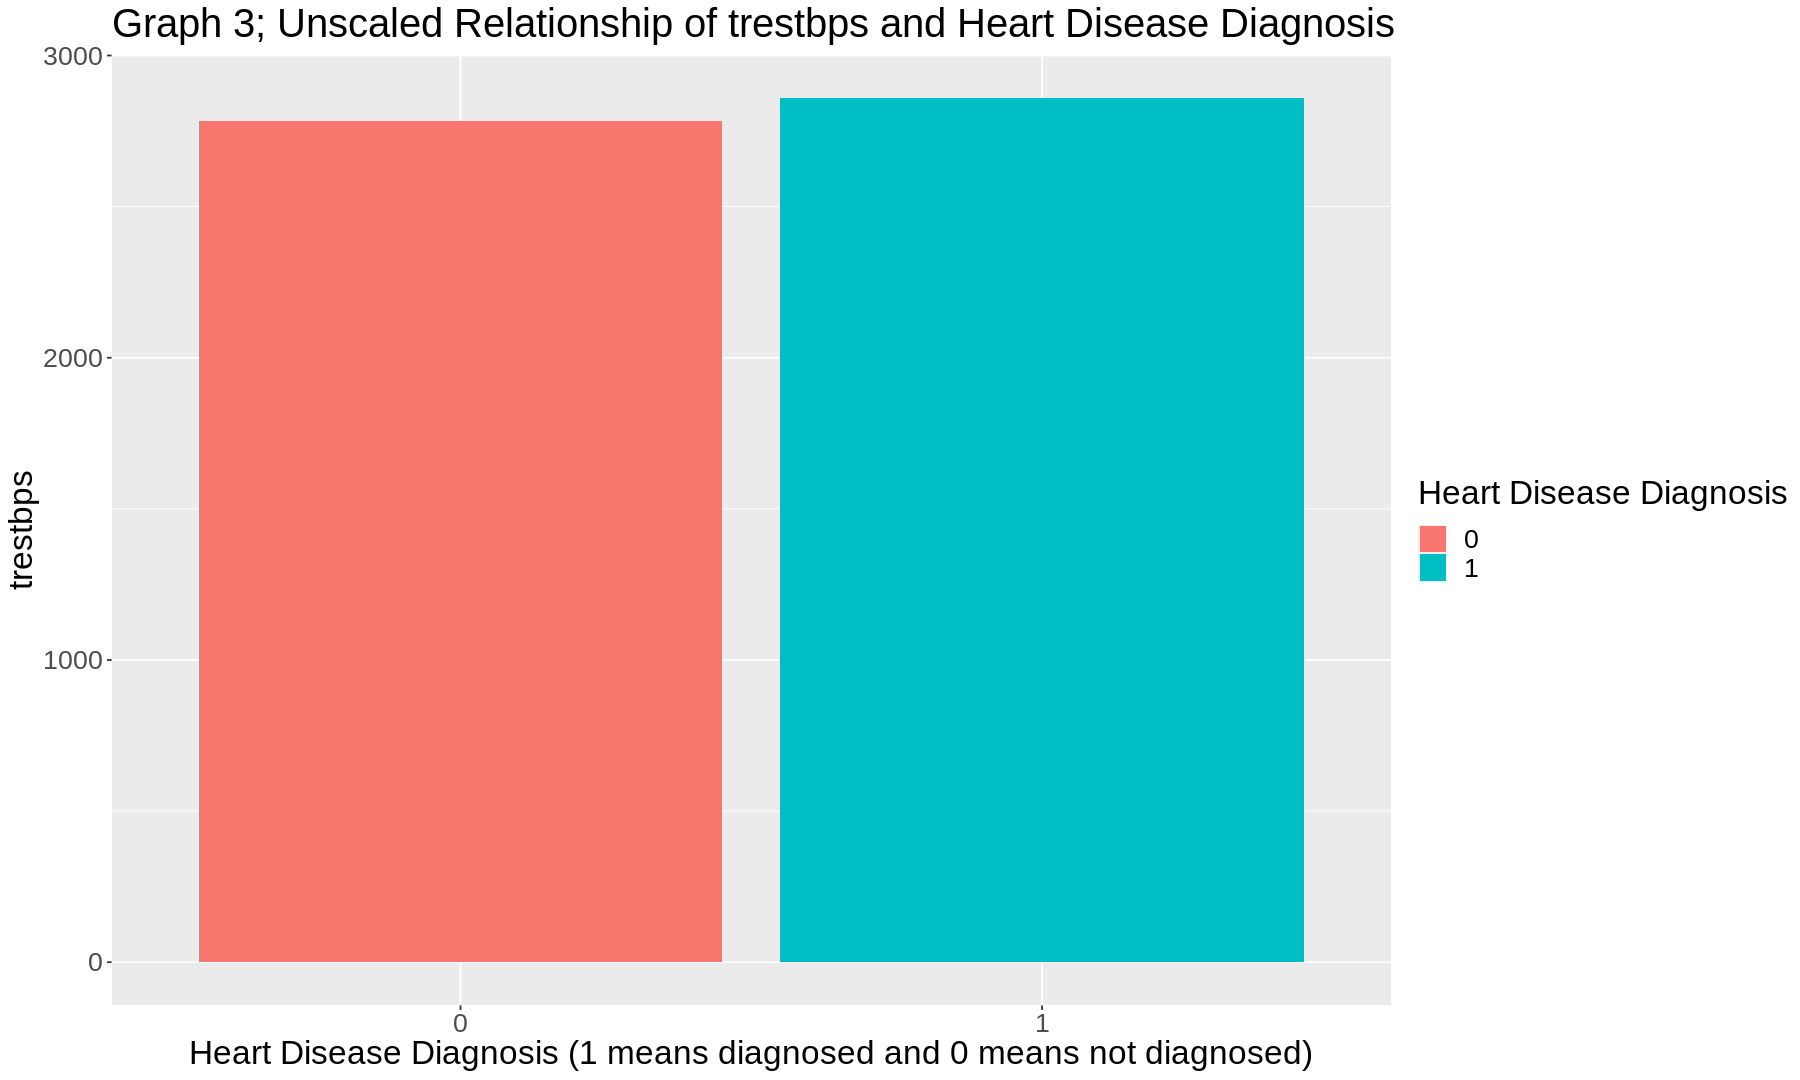

In [86]:
options(repr.plot.width=15, repr.plot.height=9)
HD_scatter_old <- ggplot(select_data_old, aes(x= Heart_disease_diagnosis, y = trestbps, fill = Heart_disease_diagnosis)) +
              geom_bar(stat = "identity") +
              labs(x = "Heart Disease Diagnosis (1 means diagnosed and 0 means not diagnosed)", y = "trestbps", fill = "Heart Disease Diagnosis") +
              ggtitle("Graph 3; Unscaled Relationship of trestbps and Heart Disease Diagnosis") +
              theme(text = element_text(size=20))
HD_scatter_old

**Graph 3**

A barplot of resting blood pressure (trestbps) vs. Heart Disease Diagnosis, using unscaled data. The bars are coloured based on heart disease diagnosis (red for a negative diagnosis (0) and blue for a positive diagnosis (1)).

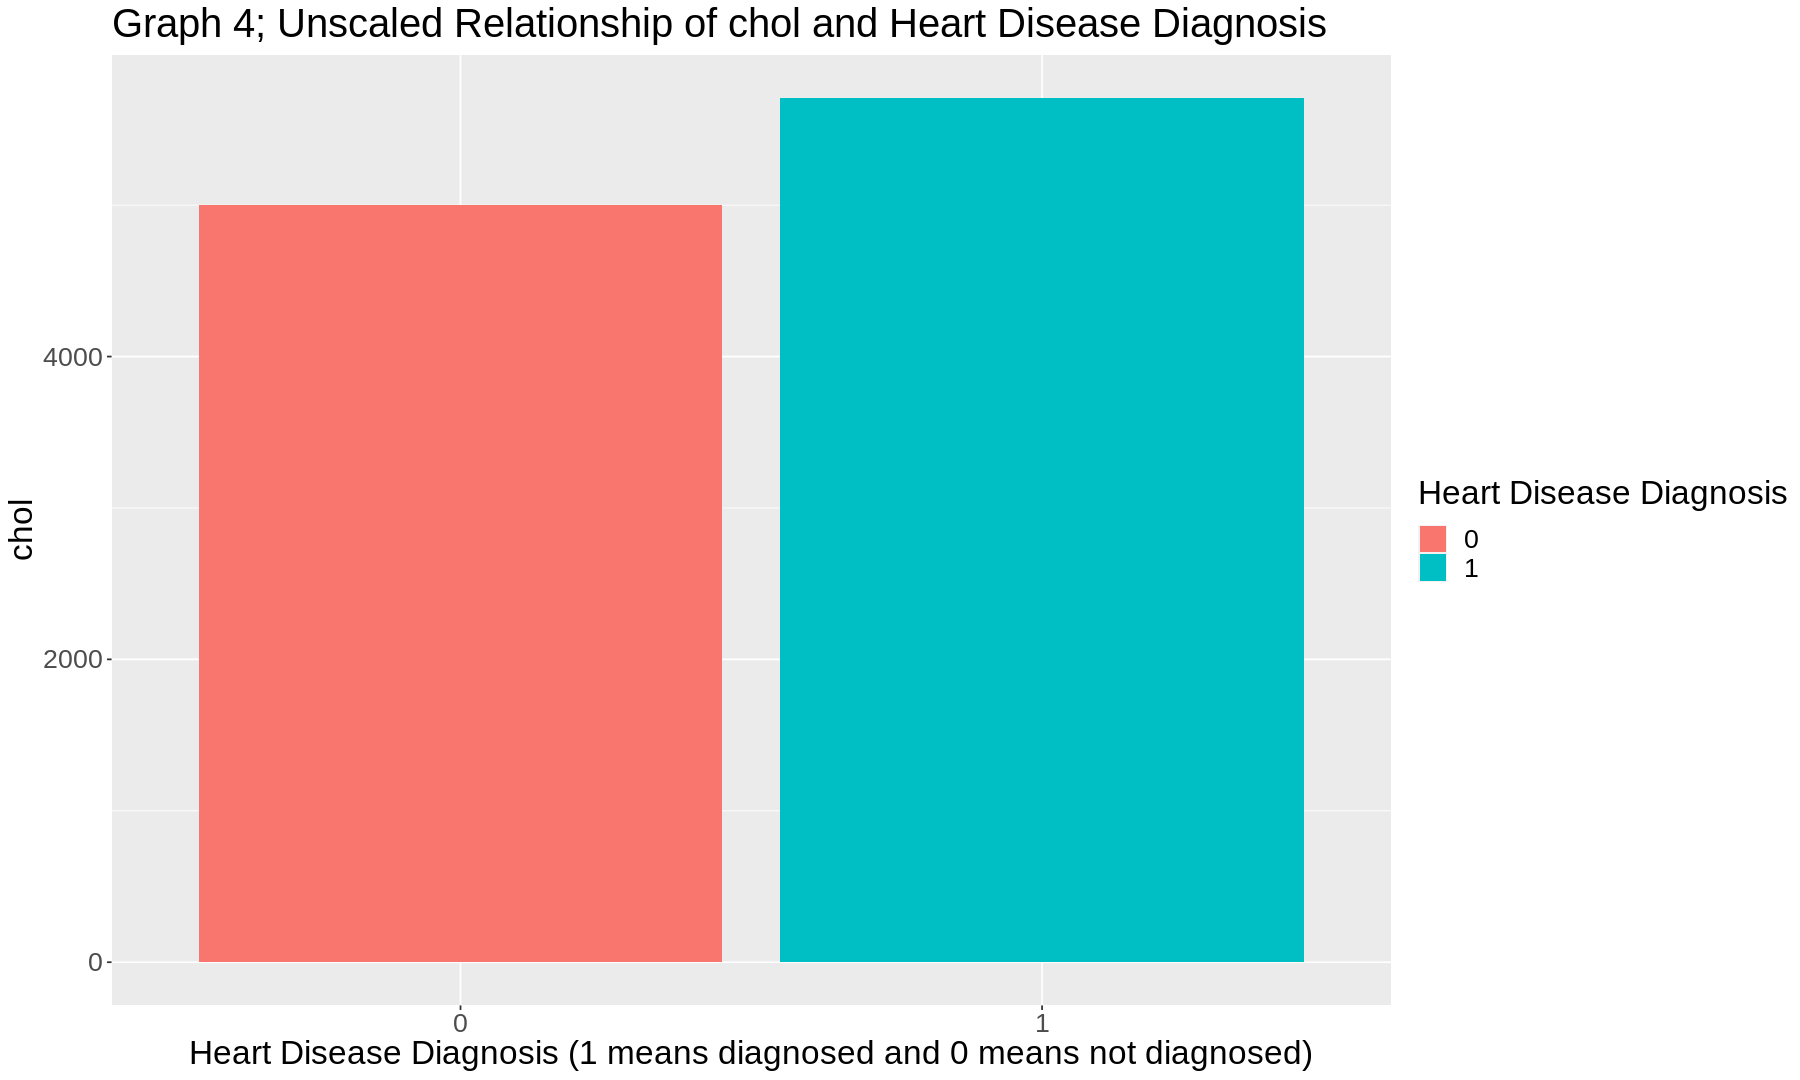

In [87]:
HD_scatter_old <- ggplot(select_data_old, aes(x= Heart_disease_diagnosis, y = chol, fill = Heart_disease_diagnosis)) +
              geom_bar(stat = "identity") +
              labs(x = "Heart Disease Diagnosis (1 means diagnosed and 0 means not diagnosed)", y = "chol", fill = "Heart Disease Diagnosis") +
              ggtitle("Graph 4; Unscaled Relationship of chol and Heart Disease Diagnosis") +
              theme(text = element_text(size=20))
HD_scatter_old

**Graph 4**

A barplot of serum cholesterol levels (chol) vs. Heart Disease Diagnosis, using unscaled data. The bars are colored based on their actual target value of heart disease (red for a negative diagnosis (0) and blue for a positive diagnosis (1)). 


In [88]:
Heart_disease_split <- initial_split(select_data, prop = 0.75, strata = Heart_disease_diagnosis)
Heart_disease_training <- training(Heart_disease_split)
Heart_disease_testing <- testing(Heart_disease_split)



We split the data set into a training data set (for creating and fitting the KNN model) and a testing data set (to test the accuracy of the KNN model). We used prop = 0.75 to split the data into 75% training and 25% testing. 75% will provide a solid amount of data to build our model while leaving enough data to verify our model. 

In [89]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

We created a KNN model specification with straight line distance to help decide which data points are the k nearest neighbours to an observation. We used neighbors = tune() to find the best value for k during cross-validation. 


In [90]:
Heart_disease_recipe <- recipe(Heart_disease_diagnosis ~ chol + trestbps, 
                        data = Heart_disease_training) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

We used a recipe to preprocess the data, scaling and centering all predictor variables to ensure they all have a mean of 0 and a standard deviation of 1 so all predictors have equal power over controlling the prediction. 

In [91]:
Heart_disease_vfold_10 <- vfold_cv(Heart_disease_training, v = 10, strata = Heart_disease_diagnosis)

We performed a ten-fold cross-validation to find the best value for K based on the training data set to predict our target variable. 10-fold cross-validation provides enough folds for a better accuracy estimate and lower standard error, while not having so many folds that the speed of the algorithm slows significantly.

In [92]:
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

We used “by = 5” to limit the slowing of the algorithm if too many k values are tested while trying to maximize accuracy, being justified as there will not be significant differences between k values of small separation (such as k = 1 compared to k = 2). 

In [93]:
knn_fit <- workflow() %>%
           add_recipe(Heart_disease_recipe) %>%
           add_model(knn_spec) %>%
           tune_grid(resamples = Heart_disease_vfold_10, grid = k_vals) %>%
           collect_metrics()
knn_fit

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5189394,10,0.03372890,Model01
1,roc_auc,binary,0.5135431,10,0.03440849,Model01
6,accuracy,binary,0.5079545,10,0.04195436,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
91,roc_auc,binary,0.5872873,10,0.02901209,Model19
96,accuracy,binary,0.5477273,10,0.01685689,Model20
96,roc_auc,binary,0.5863199,10,0.03352910,Model20


**Table 7**

We created a workflow to put our recipe and model together, and then used tune_grid to fit the model to each value from the tibble previously created. After, we collected the metrics to use in Graph 5 to analyze the accuracy for each k value.

In [94]:
accuracies <- knn_fit %>%
  filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5189394,10,0.03372890,Model01
6,accuracy,binary,0.5079545,10,0.04195436,Model02
11,accuracy,binary,0.5666667,10,0.03299395,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
86,accuracy,binary,0.5564394,10,0.01827496,Model18
91,accuracy,binary,0.5522727,10,0.02027135,Model19
96,accuracy,binary,0.5477273,10,0.01685689,Model20


**Table 8**

We filtered the metrics for accuracy to be used in the Graph 5.


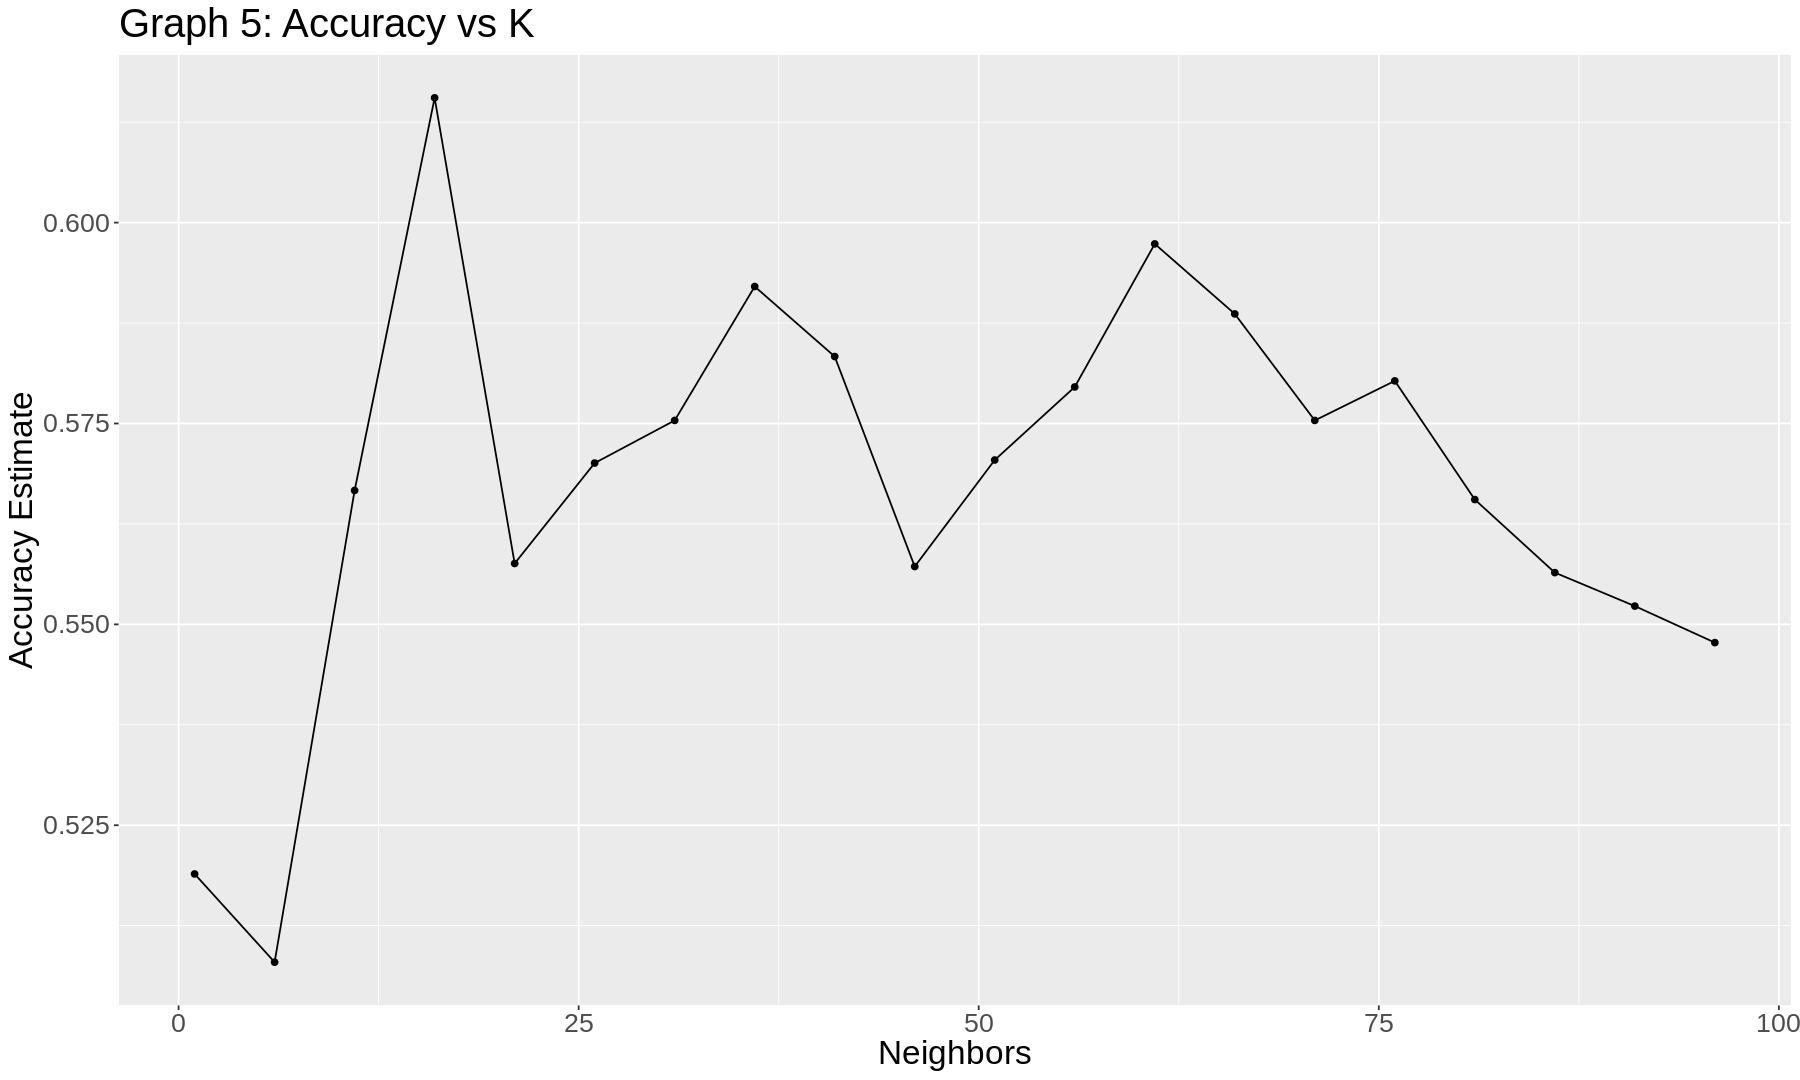

In [95]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 20)) +
  ggtitle("Graph 5: Accuracy vs K")

accuracy_vs_k

**Graph 5**

We used a line plot as it is an effective way to visualize trends and depict the relationship between 2 variables, allowing the k number of neighbours with the highest accuracy to be easily seen. 


In [96]:
bestkk<- accuracies %>% 
         arrange(mean) %>%
         filter(mean > 0.60)
bestkk

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
16,accuracy,binary,0.6155303,10,0.03594939,Model04


**Table 9**

Based on Graph 5, we know  our best k neighbours value is around an "accuracy estimate" of 0.61. Therefore, we filtered out all data below mean = 0.60 to determine our best k neighbour, which is 16.

In [104]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = 16) %>%
            set_engine("kknn") %>%
            set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 16
  weight_func = rectangular

Computational engine: kknn 


We created another KNN model specification but using the best value of K = 16 for highest accuracy.

In [105]:
knn_fit <- workflow() %>%
  add_recipe(Heart_disease_recipe) %>%
  add_model(knn_spec) %>%
  fit(data = Heart_disease_training)
knn_fit


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~16, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4210526
Best kernel: rectangular
Best k: 16

We created a workflow to put together our recipe and new model, and then used fit to retrain the classifier onto the training data using the new model.

In [107]:
Heart_disesase_test_predictions <- predict(knn_fit, Heart_disease_testing) %>%
  bind_cols(Heart_disease_testing)
Heart_disesase_test_predictions

.pred_class,age,trestbps,chol,Heart_disease_diagnosis
<fct>,<dbl>,<dbl>,<dbl>,<fct>
0,57,120,354,1
0,52,172,199,1
1,59,135,234,1
⋮,⋮,⋮,⋮,⋮
0,58,114,318,0
1,44,120,169,0
1,57,140,241,0


**Table 10**

Using the predict function, we evaluated the accuracy of our knn model by using the model on the testing data set. 


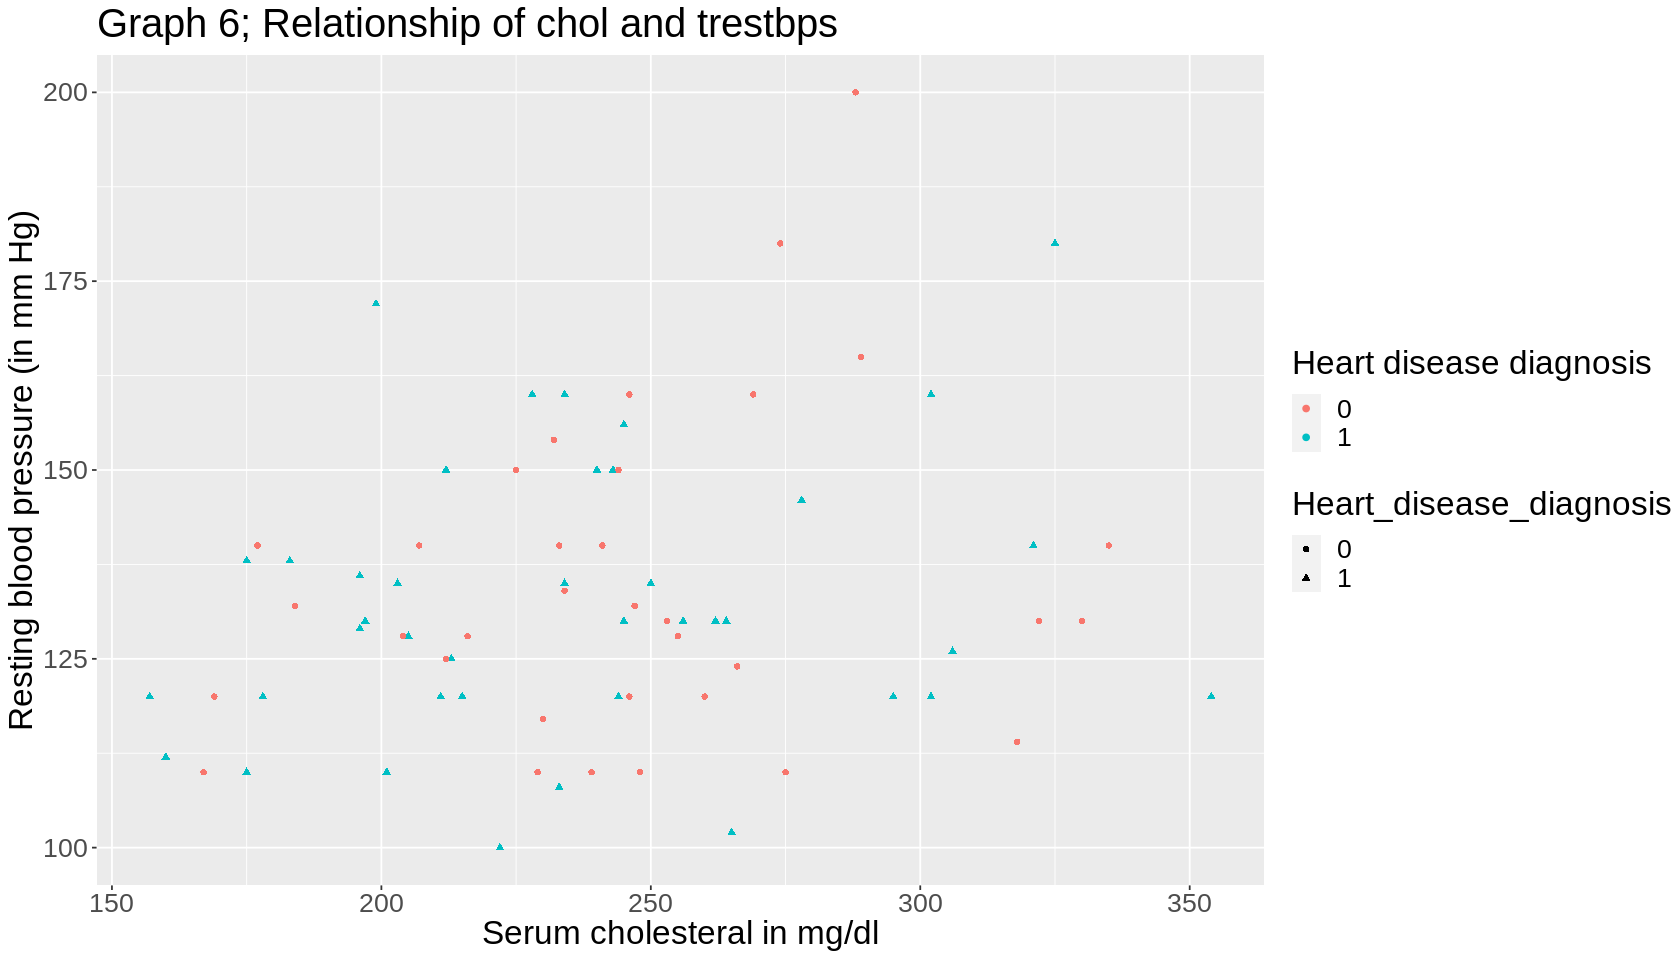

In [115]:
HD_scatter_old1 <- ggplot(Heart_disesase_test_predictions, aes(x= chol, y = trestbps,  color = Heart_disease_diagnosis, shape = Heart_disease_diagnosis)) +
                geom_point() +
              labs(x = "Serum cholesteral in mg/dl",
                   y = "Resting blood pressure (in mm Hg)",
                   colour = "Heart disease diagnosis") +
              theme(text = element_text(size=20)) +
              ggtitle("Graph 6; Relationship of chol and trestbps")
HD_scatter_old1

**Graph 6**

Scatterplots depict the relationship between two variables well, being why we used it in this case. A scatterplot of resting blood pressure (mm Hg) vs. serum cholesterol (mg/dl) used the data from the knn model to predict the testing data. The data points are colored and shaped based on their heart disease diagnosis (red and circle for a negative diagnosis (0) and blue and triangle for a positive diagnosis (1)).


In [109]:
Heart_disesase_predictions <- Heart_disesase_test_predictions %>%
                              metrics(truth = Heart_disease_diagnosis, estimate = .pred_class) %>%
                              filter(.metric == "accuracy")
Heart_disesase_predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.52


**Table 11**

In [102]:
confusion <- Heart_disesase_test_predictions %>%
             conf_mat(truth = Heart_disease_diagnosis, estimate = .pred_class)
confusion

          Truth
Prediction  0  1
         0 15 17
         1 19 24

We found the accuracy of the model’s classification.

**Table 12**

Truth represents the true value of the diagnosis and estimate represents the prediction made by our model. Based on these two values, we can verify the reliability of our model's predictions. The confusion matrix shows us that 24 patients were correctly diagnosed with heart disease and 15 were correctly predicted as healthy. However, our model classified 19 observations as incorrectly healthy and 17 observations as incorrectly diagnosed with heart disease.

In [110]:
False_negative <- 17 / (15 + 17 + 19 + 24)
False_negative

[1] 0.2266667

We calculated the portion of false negatives. False negatives refer to patients with heart disease but diagnosed as healthy.

## Discussion

We achieved an accuracy of 52%, meaning our model has a 52% probability of providing the correct diagnosis of heart disease when using predictors chol (serum cholesterol) and trestbps (resting blood pressure). We also found no strong correlation between serum cholesterol levels and resting blood pressure to the diagnosis of heart disease based on the visualization of Graph 6.
 
The results went against our expectations as the prior research indicated that both high resting blood pressure and high serum cholesterol levels predict a higher likelihood of diagnosis of heart disease. Graph 6 would have had all the “1” values in “Heart disease diagnosis” appear on the top right of the graph to show both predictors positively correlated with heart disease. However, the “1” values appear scattered, showing both predictors have little to no correlation with heart disease diagnosis. 
 
The contradiction of our model to prior research articles can be explained with a lack of regard for third variables. Third variables are other variables not accounted for that can influence the data. For our project, we used the “Heart Disease Data Set” which was an observational study that compiled variables for each patient’s conditions. Since the observation was not done in a controlled setting, variables apart from the predictor variables could be impacting when a diagnosis of heart disease happens. Third variables cause the diagnosis of heart disease to appear not correlated with the predictors, explaining why the model in Graph 6 contradicts previous research. 

In the preliminary data of Graph 3 and 4, the lack of trend between the predictor variables and heart disease diagnosis could already be seen as the bar heights are similar between diagnosed (1) and not diagnosed (0). Therefore, we deduced that our model is missing third variables that could predict the diagnosis more accurately. 
 
### What impact could such findings have?

Our findings show that many different variables determine the occurrence of heart disease, and that studying just two of them, no matter how important they are, would not provide us with an appropriate diagnosis. Despite the fact that our model can reduce false negatives to 23%, as shown in Table 12, there is not a strong enough correlation between resting blood pressure and cholesterol levels in heart disease diagnosis for them to be definitive final predictors. Furthermore, our model is inaccurate as we focused on minimizing the rate of false negatives throughout the project. This is because diagnosing a patient as healthy though they actually have heart disease is the worst outcome. In the process of minimizing false negatives better, we disregarded the accuracy of our model.
Going forward, data scientists modeling a heart disease predictor will need to use a larger number of strong predictors and account for third variables in order to make a prediction with a high level of accuracy.

### Future Questions
 
1. Knowing that using 2 predictors was insufficient in predicting heart disease diagnosis, is there an ideal number of predictors? If so, which predictors would be most accurate?
 
2. In this project, we used a small dataset, so if the number of observations increased significantly, will this change our current conclusions regarding the aforementioned predictor variables’ performance of predicting the diagnosis of heart disease?


## References

Coronary Angiography. Heart Foundation NZ. (2022). Retrieved March 30, 2022, from 
https://www.heartfoundation.org.nz/your-heart/heart-tests/coronary-angiography 

Fletcher, J. (2021, April 28). What to know about the heart rate during a heart attack. 
MedicalNewsToday. Retrieved March 31, 2022, from
https://www.medicalnewstoday.com/articles/heart-rate-during-heart-attack

Fuchs, F. D., & Whelton, P. K. (2020). High Blood Pressure and Cardiovascular Disease. 
Hypertension, 75(2), 285–292. https://doi.org/10.1161/hypertensionaha.119.14240

Heart Health and Aging. (2018, June 1). National Institute on Aging.    
https://www.nia.nih.gov/health/heart-health-and-aging

Mayo Foundation for Medical Education and Research. (2021, February 9). Heart disease. Mayo 
Clinic. Retrieved March 30, 2022, from
https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-2
0353118  

Mayo Foundation for Medical Education and Research. (2021, July 20). High cholesterol. 
Mayo Clinic. Retrieved March 31, 2022, from 
https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800#:~:text=Your%20body%20needs%20cholesterol%20to,to%20flow%20through%20your%20arteries  

UCI Machine Learning Repository: Heart disease data set. (n.d.). Retrieved March 30, 
2022, from https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Project done by Brandon Wong, Tarun Narayan, Charles Zheng, and Karina Jhingan